In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio
import random
import cv2

In [2]:
# transform a letter into random x/y points with the shape of that letter
def get_masked_data(letter, intensity = 2):
    # fill a plot with random points
    random.seed(420)
    x = []
    y = []
    
    for i in range(intensity):
        x = x + random.sample(range(0, 1000), 500)
        y = y + random.sample(range(0, 1000), 500)
    
    if letter == ' ':
        return x, y
    
    # get mask from image
    mask = cv2.imread(f'images/letters/{letter.upper()}.png',0)
    mask = cv2.flip(mask, 0)
    
    # check which points are inside the mask
    result_x = []
    result_y = []
    for i in range(len(x)):
        if (mask[y[i]][x[i]]) == 0:
            result_x.append(x[i])
            result_y.append(y[i])
            
    # return a list of x and y positions
    return result_x, result_y

# transform a text into lists coordinates to plot each letter
def text_to_data(txt, repeat=True, intensity = 2):
    print('converting text to data\n')
    letters = []
    for i in txt.upper():
        letters.append(get_masked_data(i, intensity = intensity))
    # if repeat is true, repeat first letter
    if repeat:
        letters.append(get_masked_data(txt[0], intensity = intensity))    
    return letters

def build_gif(coordinates_lists, gif_name = 'movie', n_frames=10, bg_color='#95A4AD',
              marker_color='#283F4E', marker_size = 25):
    print('building plots\n')
    filenames = []
    for index in np.arange(0, len(coordinates_lists)-1):
        # get current and next coordinates
        x = coordinates_lists[index][0]
        y = coordinates_lists[index][1]

        x1 = coordinates_lists[index+1][0]
        y1 = coordinates_lists[index+1][1]

        # Check if sizes match
        while len(x) < len(x1):
            diff = len(x1) - len(x)
            x = x + x[:diff]
            y = y + y[:diff]

        while len(x1) < len(x):
            diff = len(x) - len(x1)
            x1 = x1 + x1[:diff]
            y1 = y1 + y1[:diff]

        # calculate paths
        x_path = np.array(x1) - np.array(x)
        y_path = np.array(y1) - np.array(y)

        for i in np.arange(0, n_frames + 1):                
            # calculate current position
            x_temp = (x + (x_path / n_frames) * i)
            y_temp = (y + (y_path / n_frames) * i)    

            # plot
            fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
            ax.set_facecolor(bg_color)
            
            plt.scatter(x_temp, y_temp, c=marker_color, s = marker_size)

            plt.xlim(0,1000)
            plt.ylim(0,1000)

            # remove spines
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            # grid
            ax.set_axisbelow(True)
            ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
            ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

            # build file name and append to list of file names
            filename = f'images/frame_{index}_{i}.png'

            if (i == n_frames):
                for i in range(5):
                    filenames.append(filename)

            filenames.append(filename)

            # save img
            plt.savefig(filename, dpi=96, facecolor=bg_color)
            plt.close()

    # Build GIF
    print('creating gif\n')
    with imageio.get_writer(f'{gif_name}.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    print('gif complete\n')
    print('Removing Images\n')
    # Remove files
    for filename in set(filenames):
        os.remove(filename)

    print('done')

In [235]:
coordinates_lists = text_to_data('Thanks ', 
                                 repeat=True, 
                                 intensity=2)

build_gif(coordinates_lists, 
          gif_name = 'movie', 
          n_frames=10, 
          bg_color='#95A4AD', 
          marker_color='#283F4E', 
          marker_size = 25)

converting text to data

building plots

creating gif

gif complete

Removing Images

done


In [101]:
coordinates_lists = text_to_data('thanks ', 
                                 repeat=True, 
                                 intensity=10)

build_gif(coordinates_lists, 
          gif_name = 'movie2', 
          n_frames=7, 
          bg_color='#95A4AD', 
          marker_color='#283F4E', 
          marker_size = 15)

converting text to data

building plots

creating gif

gif complete

Removing Images

done


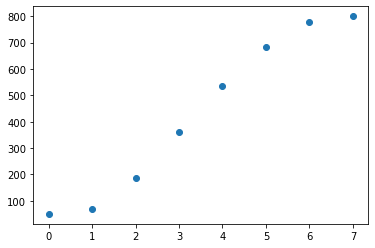

In [231]:
from scipy.interpolate import interp1d

y = 50
y1 = 800
n_frames = 7

def get_path(a, b, n_frames):
    tmp_path = [0, n_frames*0.25, n_frames*0.5, n_frames*0.75, n_frames]
    tmp_index = [a, (b-a)*0.2, (b-a)*0.6, (b-a)*0.95, b]
    
    interp = interp1d(tmp_path, tmp_index, kind='cubic')
    
    return interp(np.arange(0, n_frames+1))

plt.scatter(np.arange(0, n_frames+1), get_path(y, y1, n_frames))
#get_path(1, 100, n_frames)

In [38]:
n_frames = 10
bg_color = '#95A4AD'
bar_color = '#283F4E'
gif_name = 'bars'

x = [1, 2, 3, 4, 5]
coordinates_lists = [[0, 0, 0, 0, 0],
                     [10, 30, 60, 30, 10],
                     [70, 40, 20, 40, 70],
                     [10, 20, 30, 40, 50],
                     [50, 40, 30, 20, 10],
                     [75, 0, 75, 0, 75],
                     [0, 0, 0, 0, 0]]

print('creating plots\n')
filenames = []
for index in np.arange(0, len(coordinates_lists)-1):
    
    y = coordinates_lists[index]
    y1 = coordinates_lists[index+1]

    y_path = np.array(y1) - np.array(y)

    for i in np.arange(0, n_frames + 1):
        y_temp = (y + (y_path / n_frames) * i)

        # plot
        fig, ax = plt.subplots(figsize=(8, 4))
        ax.set_facecolor(bg_color)

        plt.bar(x, y_temp, width=0.4, color = bar_color)
        plt.ylim(0,80)

        # remove spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # grid
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

        # build file name and append to list of file names
        filename = f'images/frame_{index}_{i}.png'

        if (i == n_frames):
            for i in range(5):
                filenames.append(filename)
        if (i == n_frames and index == len(coordinates_lists)-1):
            for i in range(45):
                filenames.append(filename)

        filenames.append(filename)

        # save img
        plt.savefig(filename, dpi=96, facecolor=bg_color)
        plt.close()
    
# Build GIF
print('creating gif\n')
with imageio.get_writer(f'{gif_name}.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

print('gif complete\n')
print('Removing Images\n')

# Remove files
for filename in set(filenames):
    os.remove(filename)
    
print('done')

creating gif

gif complete

Removing Images

done


In [61]:
y = np.random.randint(30, 40, size=(40))

In [77]:
filenames = []
for index, value in enumerate(y):
    # plot the line chart
    plt.plot(y[:index])
    plt.ylim(20,50)
    
    # create file name and append it to a list
    filename = f'{index}.png'
    filenames.append(filename)
    
    # repeat last frame
    if (index == len(y)-1):
        for i in range(15):
            filenames.append(filename)
            
    # save frame
    plt.savefig(filename)
    plt.close()

# build gif
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

In [70]:
# Build GIF
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in ['1.png', '2.png', '3.png', '4.png']:
        image = imageio.imread(filename)
        writer.append_data(image)

In [81]:
x = [1, 2, 3, 4, 5]
coordinates_lists = [[0, 0, 0, 0, 0],
                     [10, 30, 60, 30, 10],
                     [70, 40, 20, 40, 70],
                     [10, 20, 30, 40, 50],
                     [50, 40, 30, 20, 10],
                     [75, 0, 75, 0, 75],
                     [0, 0, 0, 0, 0]]

filenames = []
for index, y in enumerate(coordinates_lists):
    # plot charts
    plt.bar(x, y)
    plt.ylim(0,80)
    
    # create file name and append it to a list
    filename = f'{index}.png'
    filenames.append(filename)
    
    # repeat last frame
    if (index == len(coordinates_lists)-1):
        for i in range(15):
            filenames.append(filename)
            
    # save frame
    plt.savefig(filename)
    plt.close()

# build gif
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

In [83]:
# frames between transitions
n_frames = 10

x = [1, 2, 3, 4, 5]
coordinates_lists = [[0, 0, 0, 0, 0],
                     [10, 30, 60, 30, 10],
                     [70, 40, 20, 40, 70],
                     [10, 20, 30, 40, 50],
                     [50, 40, 30, 20, 10],
                     [75, 0, 75, 0, 75],
                     [0, 0, 0, 0, 0]]

print('Creating charts\n')
filenames = []
for index in np.arange(0, len(coordinates_lists)-1):
    # get current and next y coordinates
    y = coordinates_lists[index]
    y1 = coordinates_lists[index+1]
    
    # calculate the distance to the next position
    y_path = np.array(y1) - np.array(y)

    for i in np.arange(0, n_frames + 1):
        # divide the distance by the number of frames 
        # and multiply it by the current frame number
        y_temp = (y + (y_path / n_frames) * i)

        # plot
        plt.bar(x, y_temp)
        plt.ylim(0,80)

        # build file name and append to list of file names
        filename = f'images/frame_{index}_{i}.png'

        # last frame of each viz stays longer
        if (i == n_frames):
            for i in range(5):
                filenames.append(filename)

        filenames.append(filename)

        # save img
        plt.savefig(filename)
        plt.close()
print('Charts saved\n')

# Build GIF
print('Creating gif\n')
with imageio.get_writer('mybars.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
print('Gif saved\n')

print('Removing Images\n')
# Remove files
for filename in set(filenames):
    os.remove(filename)
print('DONE')

Creating charts

Charts saved

Creating gif

Gif saved

Removing Images

DONE


In [84]:
n_frames = 10
bg_color = '#95A4AD'
bar_color = '#283F4E'
gif_name = 'bars'

x = [1, 2, 3, 4, 5]
coordinates_lists = [[0, 0, 0, 0, 0],
                     [10, 30, 60, 30, 10],
                     [70, 40, 20, 40, 70],
                     [10, 20, 30, 40, 50],
                     [50, 40, 30, 20, 10],
                     [75, 0, 75, 0, 75],
                     [0, 0, 0, 0, 0]]

print('Creating charts\n')
filenames = []
for index in np.arange(0, len(coordinates_lists)-1):
    y = coordinates_lists[index]
    y1 = coordinates_lists[index+1]

    y_path = np.array(y1) - np.array(y)

    for i in np.arange(0, n_frames + 1):
        y_temp = (y + (y_path / n_frames) * i)

        # plot
        fig, ax = plt.subplots(figsize=(8, 4))
        ax.set_facecolor(bg_color)

        plt.bar(x, y_temp, width=0.4, color = bar_color)
        plt.ylim(0,80)

        # remove spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # grid
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

        # build file name and append to list of file names
        filename = f'images/frame_{index}_{i}.png'
        filenames.append(filename)
        
        # last frame of each viz stays longer
        if (i == n_frames):
            for i in range(5):
                filenames.append(filename)

        # save img
        plt.savefig(filename, dpi=96, facecolor=bg_color)
        plt.close()
print('Charts saved\n')

# Build GIF
print('Creating gif\n')
with imageio.get_writer(f'{gif_name}.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
print('Gif saved\n')

print('Removing Images\n')
# Remove files
for filename in set(filenames):
    os.remove(filename)
print('DONE')

Creating charts

Charts saved

Creating gif

Gif saved

Removing Images

DONE


In [98]:
coordinates_lists = [[[0],[0]],
                     [[100,200,300],[100,200,300]],
                     [[400,500,600],[400,500,600]],
                     [[400,500,600,400,500,600],[400,500,600,600,500,400]],
                     [[500],[500]],
                     [[0],[0]]]
                    
coordinates_lists[0][0]

[0]

In [100]:
coordinates_lists = [[[0],[0]],
                     [[100,200,300],[100,200,300]],
                     [[400,500,600],[400,500,600]],
                     [[400,500,600,400,500,600],[400,500,600,600,500,400]],
                     [[500],[500]],
                     [[0],[0]]]

gif_name = 'movie' 
n_frames=10 

bg_color='#95A4AD'
marker_color='#283F4E' 
marker_size = 25

print('building plots\n')
filenames = []
for index in np.arange(0, len(coordinates_lists)-1):
    # get current and next coordinates
    x = coordinates_lists[index][0]
    y = coordinates_lists[index][1]

    x1 = coordinates_lists[index+1][0]
    y1 = coordinates_lists[index+1][1]

    # Check if sizes match
    while len(x) < len(x1):
        diff = len(x1) - len(x)
        x = x + x[:diff]
        y = y + y[:diff]

    while len(x1) < len(x):
        diff = len(x) - len(x1)
        x1 = x1 + x1[:diff]
        y1 = y1 + y1[:diff]

    # calculate paths
    x_path = np.array(x1) - np.array(x)
    y_path = np.array(y1) - np.array(y)

    for i in np.arange(0, n_frames + 1):                
        # calculate current position
        x_temp = (x + (x_path / n_frames) * i)
        y_temp = (y + (y_path / n_frames) * i)    

        # plot
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
        ax.set_facecolor(bg_color)
            
        plt.scatter(x_temp, y_temp, c=marker_color, s = marker_size)

        plt.xlim(0,1000)
        plt.ylim(0,1000)

        # remove spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # grid
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
        ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

        # build file name and append to list of file names
        filename = f'images/frame_{index}_{i}.png'

        if (i == n_frames):
            for i in range(5):
                filenames.append(filename)

        filenames.append(filename)

        # save img
        plt.savefig(filename, dpi=96, facecolor=bg_color)
        plt.close()

# Build GIF
print('creating gif\n')
with imageio.get_writer(f'{gif_name}.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

print('gif complete\n')
print('Removing Images\n')
# Remove files
for filename in set(filenames):
    os.remove(filename)

print('done')

building plots

creating gif

gif complete

Removing Images

done
